In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [48]:
hist = []

In [49]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01241002up.npy'))

In [50]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01241541up.npy'))

In [51]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01242103up.npy'))

In [52]:
#hist4 = np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01250942up.npy')

In [53]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01251544up.npy'))

In [54]:
edges = np.load(r'C:\Users\kyoto\WaveDump\caribration\up\up_keV_edges.npy')

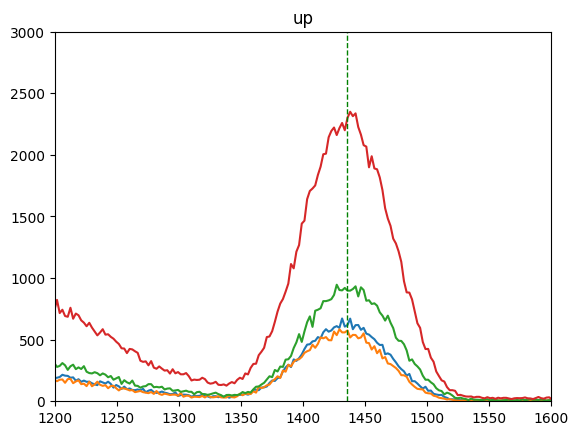

In [55]:
plt.plot(edges[:-1],hist[0])
plt.plot(edges[:-1],hist[1])
plt.plot(edges[:-1],hist[2])
plt.plot(edges[:-1],hist[3])
plt.xlim([1200,1600])
plt.ylim([0,3000])
plt.title('up')
plt.axvline(1436, color="green", linestyle="dashed", linewidth = 1)

Amplitude: 628.1549031656191 ± 4.016892382272742
Mean: 1434.6370524164067 ± 0.2606255132005253
Stddev: 35.18161889067164 ± 0.2774536325555852
Amplitude: 557.815966415101 ± 4.218668105681401
Mean: 1432.4695553382999 ± 0.3097530556596494
Stddev: 35.42665864875928 ± 0.3291669497804459
Amplitude: 924.7891772398948 ± 6.123970277829397
Mean: 1438.2156966151406 ± 0.279144854523828
Stddev: 36.07867527263998 ± 0.3022272164325994
Amplitude: 2286.22604276541 ± 10.043711647132051
Mean: 1436.322281841973 ± 0.18616231454365842
Stddev: 36.38639439343196 ± 0.2012467301937001


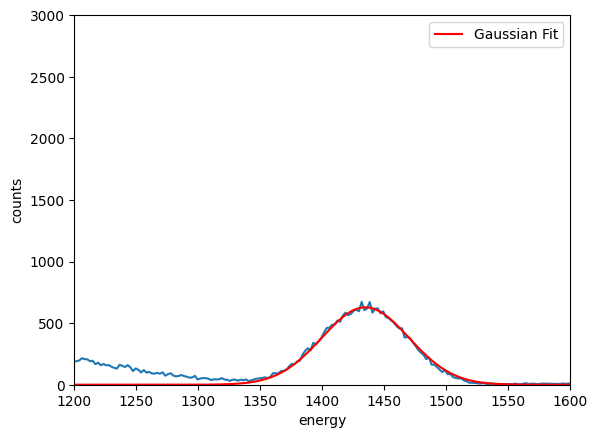

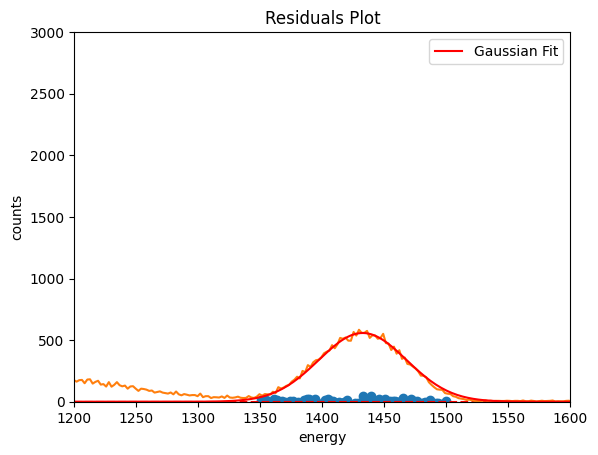

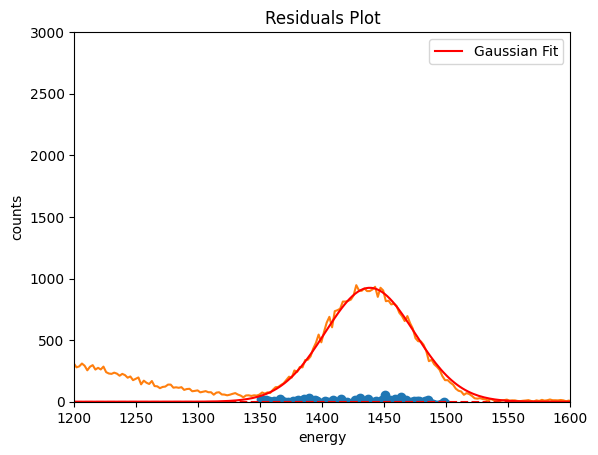

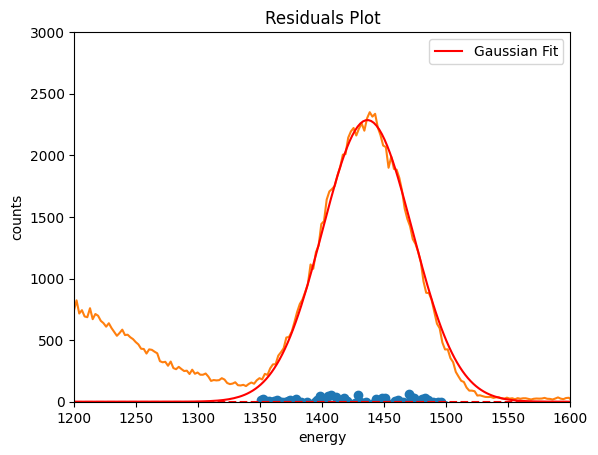

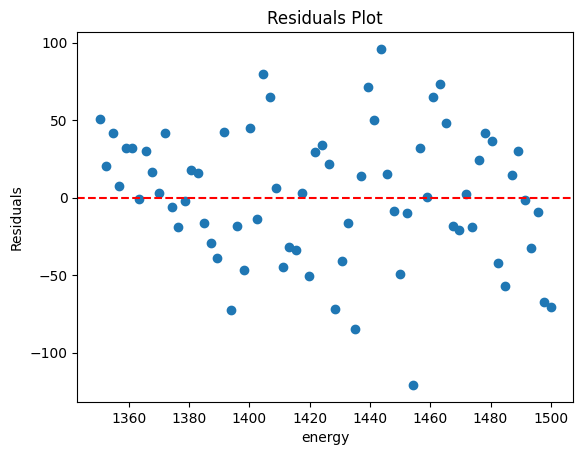

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.feature_selection import chi2

for loop in range(4):
    plt.figure
    plt.plot(edges[:-1], hist[loop])
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    fit_range_mask = (bin_centers >= 1350) & (bin_centers <= 1500)
    fit_range_bin_centers = bin_centers[fit_range_mask]
    
    fit_range_hist_data = [hist[loop][i] for i in range(len(bin_centers)) if fit_range_mask[i]]
    
    def gaussian(x, amplitude, mean, stddev):
        return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)
    
    initial_params = [1000, 1450, 10]
    
    params, covariance = curve_fit(gaussian, fit_range_bin_centers, fit_range_hist_data, p0=initial_params)
    amplitude, mean, stddev = params

    plt.plot(bin_centers, gaussian(bin_centers, amplitude, mean, stddev), 'r-', label='Gaussian Fit')
    plt.xlim([1200, 1600])
    plt.ylim([0, 3000])
    plt.xlabel('energy')
    plt.ylabel('counts')
    plt.legend()
    
    residuals = fit_range_hist_data - gaussian(fit_range_bin_centers, amplitude, mean, stddev)
    plt.figure()
    plt.plot(fit_range_bin_centers, residuals, 'o')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('energy')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    
    errors = np.sqrt(np.diag(covariance))
    print(f'Amplitude: {amplitude} ± {errors[0]}')
    print(f'Mean: {mean} ± {errors[1]}')
    print(f'Stddev: {stddev} ± {errors[2]}')
    
    # chi_squared, p_value = chi2(f_obs=fit_range_hist_data, f_exp=predicted_values)
    # print(f'Chi-squared: {chi_squared}')
    # print(f'P-value: {p_value}')

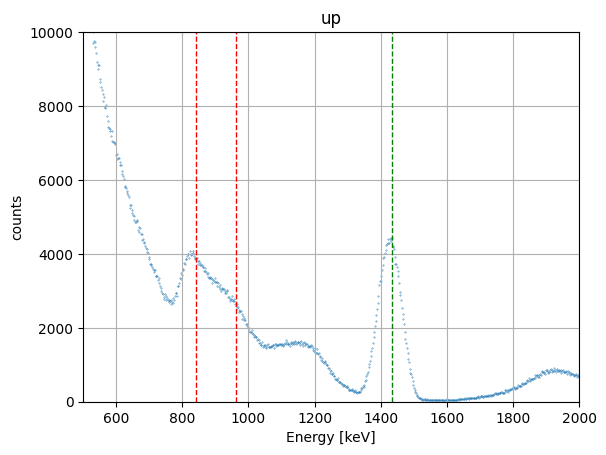

In [115]:
plt.scatter(edges, hist, s = 0.1)
#plt.yscale('log')
plt.xlim([500, 2000])
plt.ylim([0, 10000])
plt.xlabel('Energy [keV]')
plt.ylabel('counts')
plt.title('up')
plt.grid(True)
plt.axvline(841, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(963, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(1435, color="green", linestyle="dashed", linewidth = 1)
plt.savefig(r'C:\Users\kyoto\WaveDump\up.png')

In [57]:
cumulative = np.cumsum(hist * np.diff(edges)[0])

range_start = 800
range_end = 1000

indices = np.where((edges[:-1] >= range_start) & (edges[:-1] <= range_end))

integral_result = cumulative[indices][-1] if len(indices[0]) > 0 else 0

print(integral_result)

17113066.197001103


In [101]:
np.save(r'C:\Users\kyoto\WaveDump\up.npy', hist)

In [102]:
#open background data
with open(r"C:\Users\kyoto\WaveDump\up01231551_BG\01231551up0.txt") as g:
    glines = g.readlines()
    gnum = len(glines)/1023
    print(gnum)

11059.0


(500.0, 570.0)

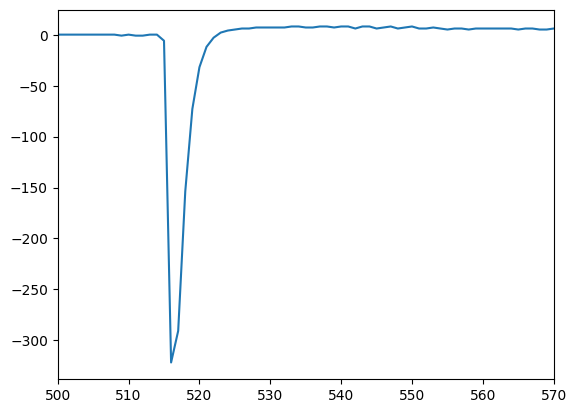

In [104]:
gtest = np.array([int(line) for line in glines[:1023]])
gtest.mean()
plt.plot(gtest - gtest[0:500].mean())
gsubtracted = gtest - gtest[0:500].mean()
gsubtracted[510:530].sum()
plt.xlim([500, 570])

Text(0, 0.5, 'ADC counts')

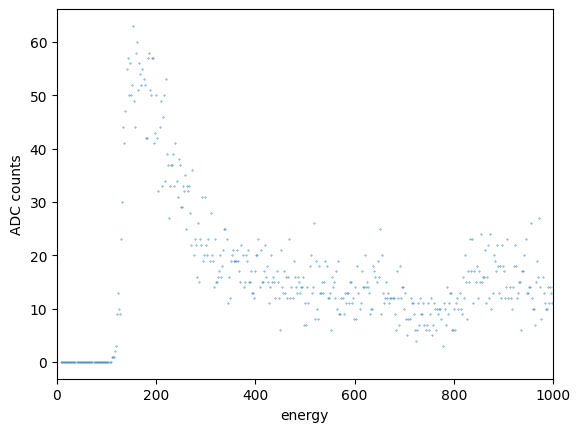

In [108]:
N_points = 1023
gdata = np.array([int(line) for line in glines])
glength = len(gdata)//N_points
gdata_res = gdata[:glength * N_points].reshape(-1,N_points)

def intg(d):
    return (d[510:525] - d[:500].mean()).sum() 

garray = [-intg(d) for d in gdata_res]
ghist, gedges = np.histogram(garray, bins=1000, range=(0,1000))

Text(0, 0.5, 'ADC counts')

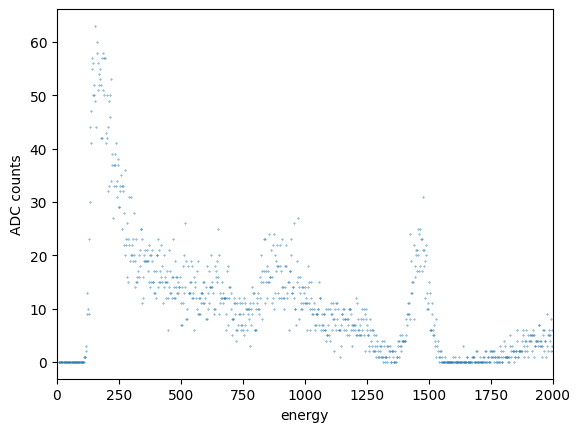

In [109]:
plt.scatter(edges, ghist, s = 0.1)
plt.xlim([0, 2000])
plt.xlabel('energy')
plt.ylabel('ADC counts')

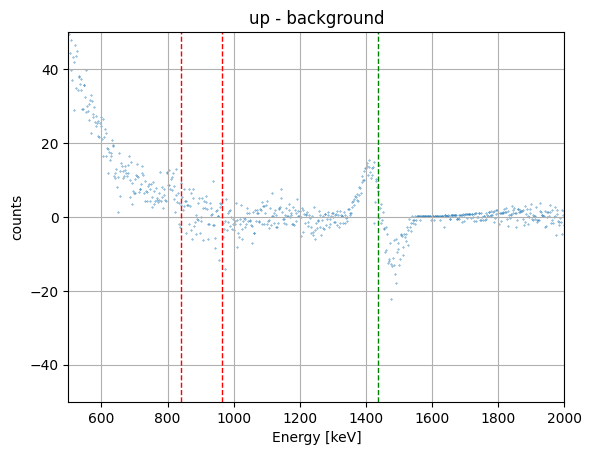

In [122]:
hist_diff = hist/191 - ghist
plt.scatter(edges, hist_diff, s=0.1)
plt.xlim([500, 2000])
plt.ylim([-50, 50])
plt.xlabel('Energy [keV]')
plt.ylabel('counts')
plt.title('up - background')
plt.grid(True)
plt.axvline(841, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(963, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(1435, color="green", linestyle="dashed", linewidth = 1)
plt.savefig(r'C:\Users\kyoto\WaveDump\upminusback.png')